In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

In [2]:
data = pd.read_csv("./통신고객이탈.csv", engine="python")
data.head()
data.loc[data["CHURN"] == "Active","CHURN"] = 0
data.loc[data["CHURN"] == "Churned","CHURN"] = 1
data.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
data.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [4]:
np.random.seed(seed=1234)
msk = np.random.rand(data.shape[0],) < 0.7
df_train = data[msk]
df_test = data[~msk]

print("train_data_size:",df_train.shape)
print("test_data_size:",df_test.shape)

train_data_size: (635, 15)
test_data_size: (295, 15)


In [5]:
df_const_train = sm.add_constant(df_train)
df_const_train.head()

,const,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,1.0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,1.0,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,1.0,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
5,1.0,0,K105530,M,51,CAT 100,S80,Med,49.43,3,289,486.6,1,31.8,427,903.3
6,1.0,0,K106210,F,30,CAT 100,ASAD170,Med,32.30,6,427,729.6,12,52.8,490,907.2


In [6]:
# df_const_train["USAGE_BAND"].value_counts()
# df_const_train.drop("CUSTOMER_ID",axis=1)

In [7]:
log_model = sm.Logit.from_formula("""CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) +
                                    SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO+PEAK_CALLS_TIME + 
                                    WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME + 1""",
                                 df_const_train)
# log_model = sm.Logit.from_formula("CHURN ~ AGE + 1",
#                                   df_const_train.drop("CUSTOMER_ID",axis=1))
log_res = log_model.fit(method="bfgs")
print(log_res.summary())

         Current function value: 0.261293
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 42
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  635
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                           29
Date:                Sun, 10 Feb 2019   Pseudo R-squ.:                  0.4660
Time:                        22:20:44   Log-Likelihood:                -165.92
converged:                      False   LL-Null:                       -310.70
                                        LLR p-value:                 9.369e-45
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -1.1342      2

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


---

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split

In [10]:
df_dummy = pd.get_dummies(data)
df_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
df_y = df_dummy["CHURN"]
df_x = df_dummy.drop("CHURN",axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,test_size=0.30,random_state=1234)

print("train data X size:",df_train_x.shape)
print("train data Y size:",df_train_x.shape)
print("test data X size:",df_test_x.shape)
print("test data Y size:",df_test_x.shape)

train data X size: (651, 963)
train data Y size: (651, 963)
test data X size: (279, 963)
test data Y size: (279, 963)


In [17]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
print("Accucary on trainning set: %.3f"% tree_uncustomized.score(df_train_x, df_train_y))
print("Accucary on test set: %.3f"% tree_uncustomized.score(df_test_x, df_test_y))

Accucary on trainning set: 1.000
Accucary on test set: 0.878


In [18]:
train_accuracy =[]
test_accuracy = []

para_criterion = ['gini',"entropy"]

for criterion in para_criterion:
    tree1 = DecisionTreeClassifier(criterion=criterion, random_state=1234)
    tree1.fit(df_train_x,df_train_y)
    train_accuracy.append(tree1.score(df_train_x,df_train_y))
    test_accuracy.append(tree1.score(df_test_x,df_test_y))
    
df_accuracy1 = pd.DataFrame()
df_accuracy1["Criterion"] = para_criterion
df_accuracy1["TrainAccuracy"] = train_accuracy
df_accuracy1["TestAccuracy"] = test_accuracy
df_accuracy1.round(3)

,Criterion,TrainAccuracy,TestAccuracy
0,gini,1.0,0.878
1,entropy,1.0,0.835


In [23]:
train_accuracy =[]
test_accuracy = []

para_criterion = []
para_max_depth=[]

n_iter_depth = 10
list_criterion = ['gini',"entropy"]

for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion, random_state=1234)
        tree2.fit(df_train_x,df_train_y)

        train_accuracy.append(tree2.score(df_train_x,df_train_y))
        test_accuracy.append(tree2.score(df_test_x,df_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [24]:
df_accuracy2 = pd.DataFrame()
df_accuracy2["Criterion"] = para_criterion
df_accuracy2["Depth"] = para_max_depth
df_accuracy2["TrainAccuracy"] = train_accuracy
df_accuracy2["TestAccuracy"] = test_accuracy
df_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,1.0,0.878
1,gini,2,1.0,0.878
2,gini,3,1.0,0.878
3,gini,4,1.0,0.878
4,gini,5,1.0,0.878
5,gini,6,1.0,0.878
6,gini,7,1.0,0.878
7,gini,8,1.0,0.878
8,gini,9,1.0,0.878
9,gini,10,1.0,0.878


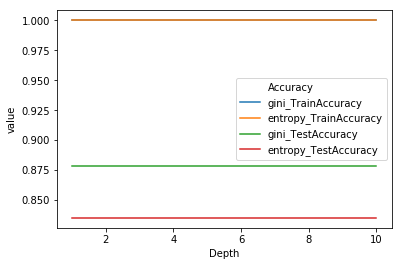

In [25]:
df_accuracy2_melt = pd.melt(df_accuracy2, id_vars=["Criterion","Depth"])
df_accuracy2_melt["Accuracy"] = df_accuracy2_melt["Criterion"] +"_"+ df_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=df_accuracy2_melt)